In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# K-Means Clustering

# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

# Carregando os dados
dataset = pd.read_csv("../bases/Mall_Customers.csv", sep = ",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# x
X = dataset.iloc[:, [3, 4]].values

Restam as variáveis ​​do conjunto de dados 3 e 4, que correspondem à receita anual em milhares e à pontuação do cliente.

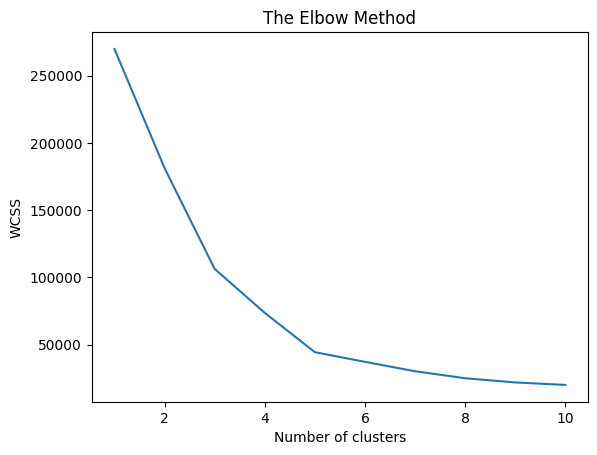

In [4]:
# Método do cotovelo para encontrar o número ideal de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Link: https://en.wikipedia.org/wiki/K-means_clustering

No bloco anterior, geramos os clusters para valores de 1 a 10 (na faixa de 1 a 11) e obtemos para cada um deles, a soma das distâncias com o atributo inertia_ do objeto kmeans. No gráfico observamos que o decréscimo na soma das distâncias é atenuado quando o número de clusters é igual a 5, portanto, para este caso prático, o número ótimo de clusters será 5.


In [5]:
# Criando o k-Means para 5 grupos
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

Para observar graficamente a atribuição dos 200 clientes a 5 grupos ou clusters, fazemos o seguinte, atribuímos uma cor a cada grupo e marcamos os centróides em amarelo:

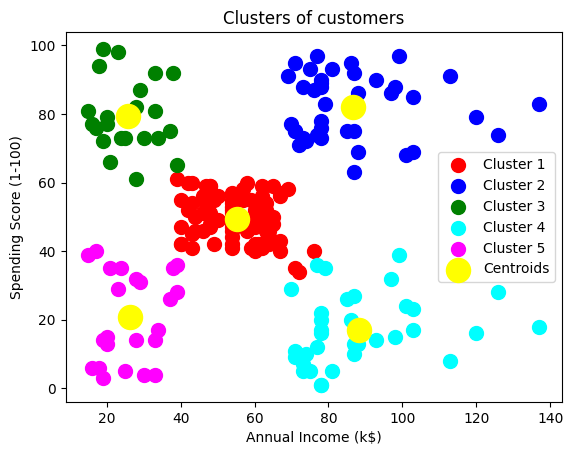

In [6]:
# Visualização gráfica dos clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

1. Calcular o Índice de Silhouette

In [7]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


2. Gerando as exibições gráficas do Silhouette Index através do uso da biblioteca **yellowbrick** para um K = 2, 3, 4, 5, 6, 7.

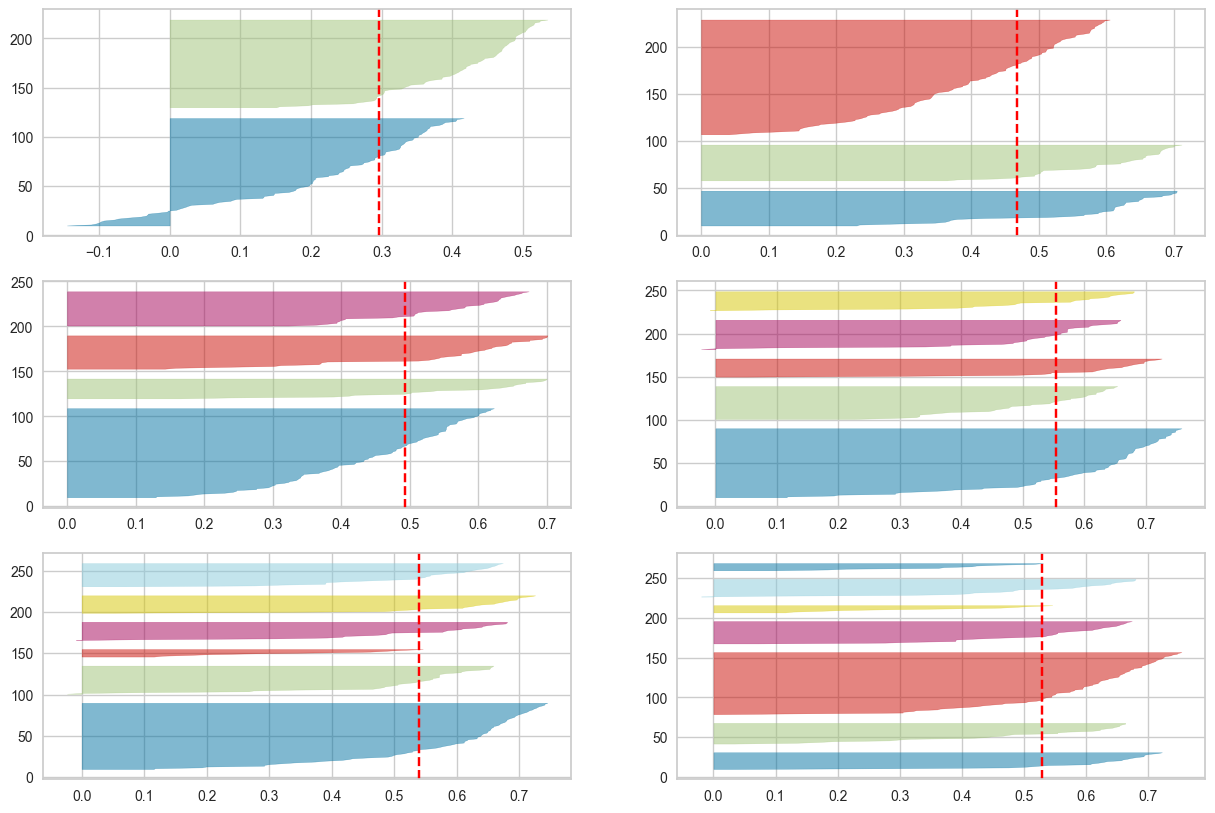

In [10]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,10)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5, 6, 7]:
    
    #Criando diferentes instâncias de kmeans para diferentes quantidades de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Exibimos o índice Silhouette com yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

3. Interpretar os resultados obtidos

Com a aplicação do método Silhouette, podemos confirmar que o número K = 5 é o valor mais ótimo para nosso agrupamento, fato que confirma a aplicação do método Elbow.